# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#url
# query_url = f"{url}appid={api_key}&q={city}&units={units}"
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        weather_response = requests.get(f"{query_url}&q={city}&units={units}").json() 
        name.append(weather_response['name'])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        max_temp.append(weather_response["main"]["temp_max"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_record = weather_response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait 1 second in loop 
        time.sleep(1)
#     If a city isn't fount skipping to the next call
    except:
        print("City not found. Skipping...")
    continue

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Port Macquarie
City not found. Skipping...
Processing Record 2 | Mackenzie
City not found. Skipping...
Processing Record 3 | Loreto
Processing Record 4 | Albany
Processing Record 5 | Jamestown
Processing Record 6 | Kununurra
Processing Record 7 | Punta Arenas
Processing Record 8 | Beernem
Processing Record 9 | Bathsheba
Processing Record 10 | Khatanga
Processing Record 11 | Cidreira
City not found. Skipping...
Processing Record 12 | Aksu
Processing Record 13 | Lagoa
City not found. Skipping...
Processing Record 14 | Tasiilaq
Processing Record 15 | Rikitea
Processing Record 16 | Rudnogorsk
Processing Record 17 | Katobu
Processing Record 18 | Saldanha
Processing Record 19 | Ahipara
Processing Record 20 | Bluff
Processing Record 21 | Nikolskoye
City not found. Skipping...
City not found. Skipping...
Processing Record 22 | Saint-Pierre
Processing Record 23 | Dayong
Processing Record 24 | Dolinsk
Processing Recor

Processing Record 225 | Adolfo López Mateos
Processing Record 226 | Port Lincoln
Processing Record 227 | Takoradze
Processing Record 228 | Debre Birhan
Processing Record 229 | Santa Isabel Rio Negro
Processing Record 230 | Leningradskiy
Processing Record 231 | Cockburn Town
Processing Record 232 | Montijo
Processing Record 233 | Miajadas
Processing Record 234 | Naze
Processing Record 235 | Port Blair
Processing Record 236 | Champerico
Processing Record 237 | Pevek
Processing Record 238 | Palekastro
Processing Record 239 | Itaíba
City not found. Skipping...
Processing Record 240 | Yantal'
Processing Record 241 | Antsohihy
Processing Record 242 | Pimentel
Processing Record 243 | Araouane
Processing Record 244 | Hofn
Processing Record 245 | Kalianget
Processing Record 246 | Sorong
Processing Record 247 | Iqaluit
Processing Record 248 | Carutapera
Processing Record 249 | Road Town
Processing Record 250 | San Nicolas
Processing Record 251 | Ponta do Sol
Processing Record 252 | Cloquet
Proce

Processing Record 456 | Ziro
Processing Record 457 | Moyo
Processing Record 458 | Acapulco de Juárez
Processing Record 459 | Iquitos
Processing Record 460 | Makakilo City
Processing Record 461 | Jacareacanga
Processing Record 462 | Ukiah
Processing Record 463 | Mackay
Processing Record 464 | Lompoc
Processing Record 465 | Atlantic Beach
Processing Record 466 | Itaituba
Processing Record 467 | Sakaiminato
Processing Record 468 | Gold Coast
Processing Record 469 | Ulaangom
Processing Record 470 | Henties Bay
Processing Record 471 | Mount Gambier
Processing Record 472 | Demyansk
Processing Record 473 | Fernie
Processing Record 474 | Plouzané
Processing Record 475 | Douglas
Processing Record 476 | Dzilam González
Processing Record 477 | Paramonga
Processing Record 478 | Roura
Processing Record 479 | Villa Carlos Paz
Processing Record 480 | Maniitsoq
Processing Record 481 | Córdoba
Processing Record 482 | Prome
Processing Record 483 | Muros
Processing Record 484 | Igarka
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a dict
city_weather = pd.DataFrame({ 
                "City" : name,
                 "Cloudiness" : cloudiness,
                 "Country" : country,
                 "Date" : date,
                 "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

#Print
city_weather.count()
city_weather.to_csv("../output_data/cities.csv", index = False)

In [6]:
city_weather.head(6)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Macquarie,0,AU,1593574378,42,-31.43,152.92,68.00,1.01
1,Mackenzie,40,CA,1593574379,77,55.30,-123.17,60.80,3.36
2,Loreto,100,MX,1593574381,52,22.27,-101.97,69.84,16.73
3,Albany,99,US,1593574201,92,42.60,-73.97,64.99,1.92
4,Jamestown,1,US,1593574383,82,42.10,-79.24,64.40,2.64
5,Kununurra,28,AU,1593574384,18,-15.77,128.73,87.80,11.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
humidity = city_weather.loc[(city_weather['Humidity'] > 100)]
humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [15]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

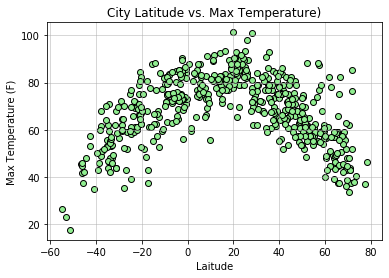

In [16]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], facecolor = "lightgreen", edgecolor = "black")

# Title
plt.title("City Latitude vs. Max Temperature)")

# X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Max Temperature (F)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

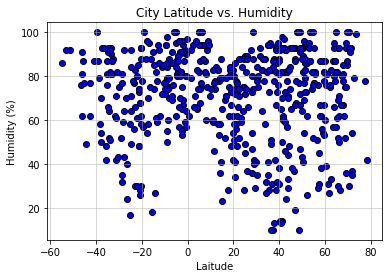

In [17]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Humidity"], facecolor = "blue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Humidity")

# X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

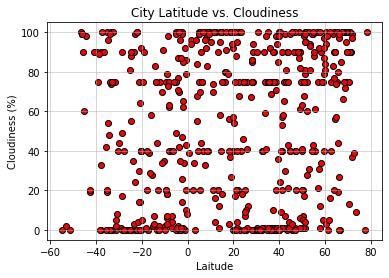

In [18]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], facecolor = "Red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Cloudiness (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

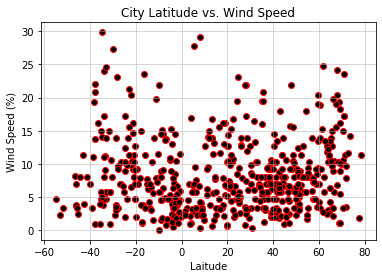

In [19]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], facecolor = "black", edgecolor = "red")

# Set title
plt.title("City Latitude vs. Wind Speed")

# X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Wind Speed (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_agression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [21]:
# Create Northern and Southern Hemisphere DataFrames
n_hemisphere = city_weather.loc[city_weather["Lat"] >= 0]
s_hemisphere = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.5x + 89.07


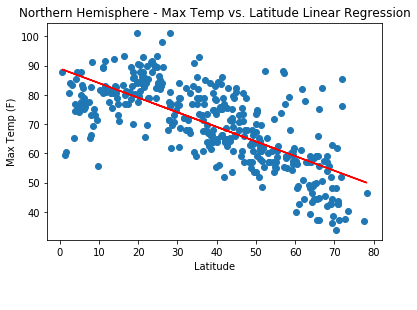

In [22]:
# Call an function #1
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Max Temp"])

# Plot funtion
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Max Temp (F)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.78x + 80.37


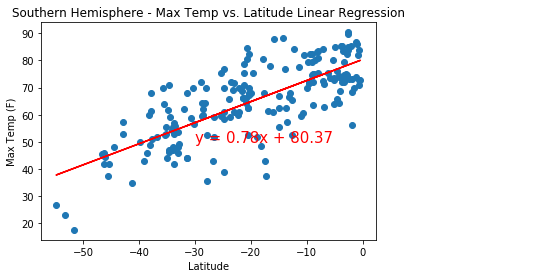

In [23]:
# Call an function #1
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Max Temp"])

# Plot funtion
annotate(equation, -30, 50)
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Max Temp (F)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.02x + 71.45


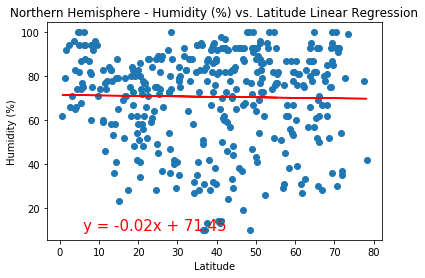

In [24]:
# Call an function #1
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Humidity"])

# Plot funtion
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Humidity (%)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.15x + 76.6


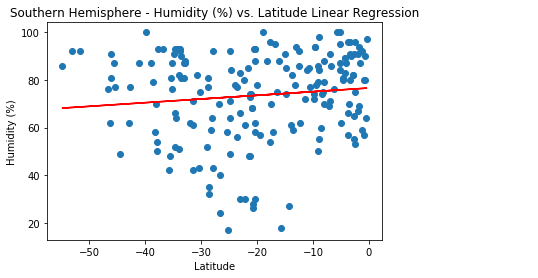

In [25]:
# Call an function #1
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Humidity"])

# Plot funtion
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Humidity (%)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.14x + 49.62


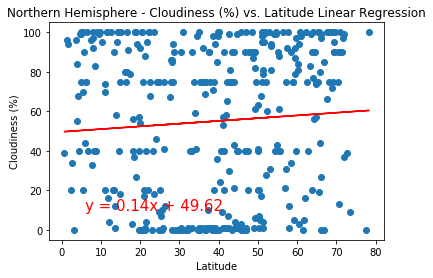

In [26]:
# Call an function #1
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Cloudiness"])

# Plot funtion
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Cloudiness (%)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.08x + 38.45


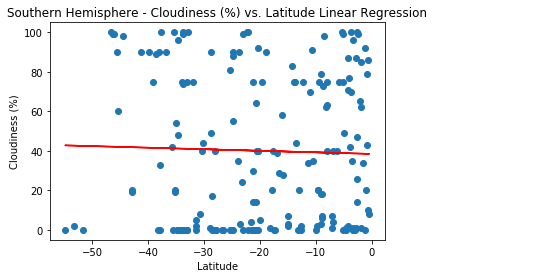

In [27]:
# Call an function #1
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Cloudiness"])

# Plot funtion
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Cloudiness (%)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x + 6.4


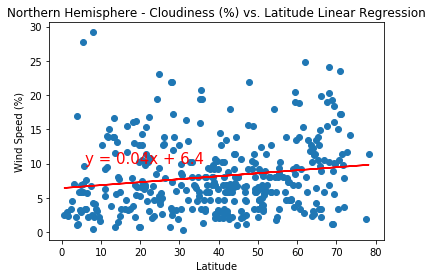

In [28]:
# Call an function #1
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Wind Speed"])

# Plot funtion
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Wind Speed (%)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.08x + 6.61


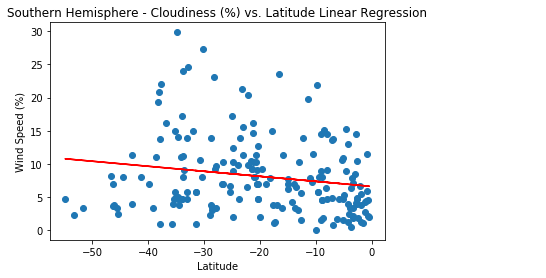

In [29]:
# Call an function #1
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Wind Speed"])

# Plot funtion
plt.annotate(equation,(6,10),fontsize=15,color="red")

# Title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Wind Speed (%)")

# Print equation
print(equation)

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")